In [31]:
import numpy as np
from matplotlib import pyplot as plt

Initial equation

In [32]:
yprime = lambda x, y: np.power(y, 4) * np.cos(x) + y * np.tan(x)

Exact solution

In [33]:
exact = lambda x: 1 / (np.cbrt(np.power(np.cos(x), 2) * (np.cos(x) - 2 * np.sin(x))))

In [89]:
asymptotes = [np.isclose(np.cos(x), 0) for x in np.linspace(0, 9.5, 9501)]
any(asymptotes)

False

Euler method

In [97]:
trim = 100000000
def euler(x0: float, y0: float, x: float, h: float):
    a = [(x0, y0)]
    i = x0
    while i < x:
        i += h
        if np.isclose(np.cos(x), 0):
            continue
        
        xprev, yprev = a[-1]
        ynew = yprev + h * yprime(xprev, yprev)
        
        if (ynew > trim): ynew = trim # Should not be here
        if (ynew < -trim): ynew = -trim
        
        a.append((i, ynew))
        
    return a

Improved Euler method

In [98]:
def euler_improved(x0: float, y0: float, x: float, h: float):
    a = [(x0, y0)]
    i = x0
    while i < x:
        i += h
        if np.isclose(np.cos(x), 0):
            continue
        
        xprev, yprev = a[-1]
        ydelta = h * yprime(xprev + h/2, yprev + (h/2) * yprime(xprev, yprev))
        ynew = yprev + ydelta
        
        if (ynew > trim): ynew = trim # Should not be here
        if (ynew < -trim): ynew = -trim
        
        a.append((i, ynew))
    
    return a

Runge-Kutta method

In [100]:
def runge_kutta(x0: float, y0: float, x: float, h: float):
    a = [(x0, y0)]
    i = x0
    while i < x:
        i += h
        if np.isclose(np.cos(x), 0):
            continue
        
        xprev, yprev = a[-1]
        k1 = yprime(xprev, yprev)
        k2 = yprime(xprev + h / 2, yprev + (h * k1) / 2)
        k3 = yprime(xprev + h / 2, yprev + (h * k2) / 2)
        k4 = yprime(xprev + h, yprev + h * k3)
        ydelta = (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        ynew = yprev + ydelta
        if (ynew > trim): ynew = trim # Should not be here
        if (ynew < -trim): ynew = -trim
        
        a.append((i, ynew))
    
    return a

Making plots

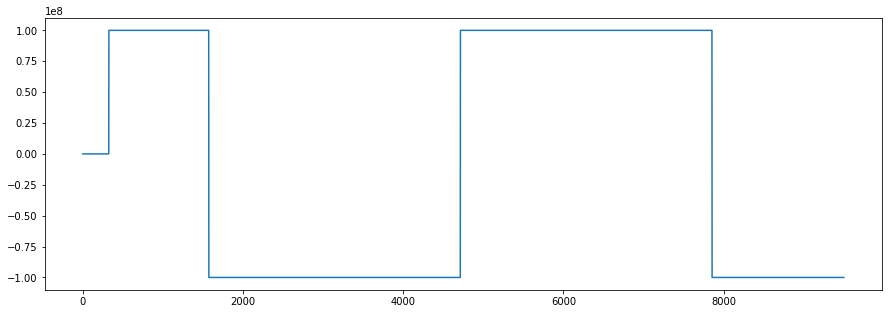

In [102]:
ea = euler_improved(0, 1, 9.5, 0.001)
eay = [i[1] for i in ea]
%gui notebook
plt.figure(figsize=(15, 5))
plt.plot(eay)

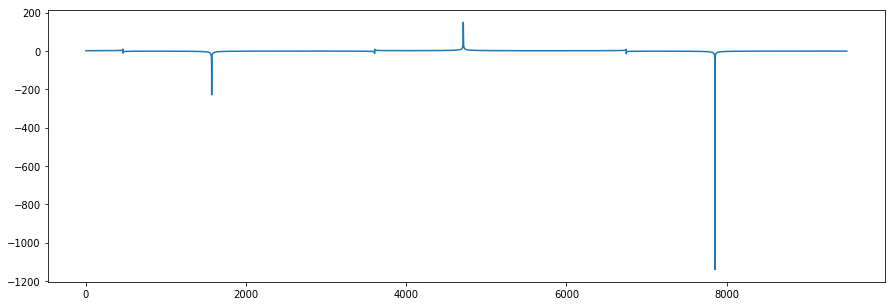

In [86]:
plt.figure(figsize=(15,5))
plt.plot([exact(x) for x in np.linspace(0, 9.5, 9501)])